In [11]:
import numpy as np
import os
import pandas as pd 
import unidecode
import unicodedata
import datetime
import random
import datetime
from datetime import datetime, date, timedelta
import math
from math import sqrt
from matplotlib import pyplot as plt
import scipy.stats as stats

# Exploremos con data de verdad! 

# Importamos el SISA  
(todos los datos de COVID-19 del Ministerio de Salud)

http://datos.salud.gob.ar/dataset/covid-19-casos-registrados-en-la-republica-argentina

In [ ]:
import os
os.system('wget https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv');

In [169]:
cases = pd.read_csv('Covid19Casos.csv', sep=',',encoding='utf-8')

### Exploramos la data

In [5]:
# Longitus de la data
len(cases)

894893

In [3]:
# Primeras 5 filas
cases[:5]

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-08-13
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-08-13
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-08-13
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-08-13
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - Con muestra sin resultado,Sospechoso,6,NaN,515,2020-08-13


In [143]:
# Todos los datos exactos de un registro
cases.iloc[75061]

id_evento_caso                                                          1092110
sexo                                                                          F
edad                                                                         46
edad_años_meses                                                            Años
residencia_pais_nombre                                                Argentina
residencia_provincia_nombre                                        Buenos Aires
residencia_departamento_nombre                               General San Martín
carga_provincia_nombre                                                     CABA
fecha_inicio_sintomas                                                       NaN
fecha_apertura                                                       2020-06-16
sepi_apertura                                                                25
fecha_internacion                                                           NaN
cuidado_intensivo                       

## Cuál será la proba de quedar confirmado cuando te hacen el análisis ? 
(índice de positividad)

In [49]:
negativos = len(cases.loc[cases['clasificacion_resumen'] == 'Descartado'])
positivos = len(cases.loc[cases['clasificacion_resumen'] == 'Confirmado'])
print(positivos, negativos)

276055 522915


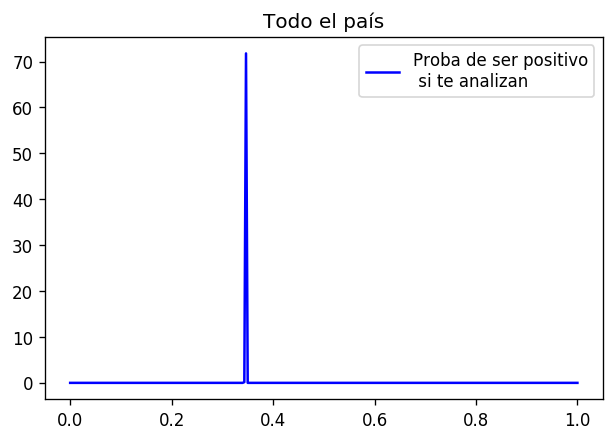

In [144]:
xs = np.linspace(0,1,301)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=positivos+1, b=negativos+1),'b-',label='Proba de ser positivo\n si te analizan')
plt.title('Todo el país')
plt.legend(loc=1)
plt.show()

### Y si marginalizamos sobre sexo?

In [145]:
negativosM = len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['sexo'] == 'M')])
positivosM = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'M')])
print(positivosM, negativosM)
negativosF = len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['sexo'] == 'F')])
positivosF = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'F')])
print(positivosF, negativosF)

140073 252591
135040 268552


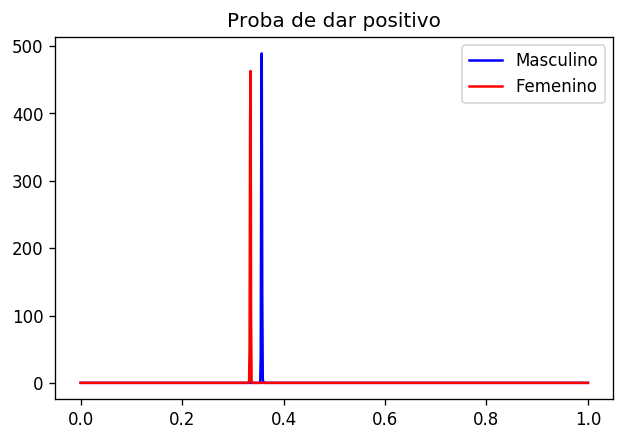

In [146]:
xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=positivosM+1, b=negativosM+1),'b-',label='Masculino')
plt.plot(xs, stats.beta.pdf(xs,a=positivosF+1, b=negativosF+1),'r-',label='Femenino')
plt.title('Proba de dar positivo')
plt.legend(loc=1)
plt.show()

### En alguna localidad específica ?

In [147]:
# VEamos todas las localidades existentes, sin repetir y en orden alfabético
todas = cases['residencia_departamento_nombre'].tolist()
unicas = list(dict.fromkeys(todas))
print(sorted(unicas))

['12 de Octubre', '1º de Mayo', '2 de Abril', '25 de Mayo', '9 de Julio', 'Adolfo Alsina', 'Adolfo Gonzales Chaves', 'Aguirre', 'Albardón', 'Alberdi', 'Alberti', 'Almirante Brown', 'Aluminé', 'Ambato', 'Ancasti', 'Andalgalá', 'Angaco', 'Anta', 'Antofagasta de la Sierra', 'Antártida Argentina', 'Apóstoles', 'Arauco', 'Arrecifes', 'Atamisqui', 'Atreucó', 'Avellaneda', 'Ayacucho', 'Azul', 'Añelo', 'Bahía Blanca', 'Balcarce', 'Banda', 'Baradero', 'Bariloche', 'Belgrano', 'Bella Vista', 'Belén', 'Benito Juárez', 'Berazategui', 'Berisso', 'Bermejo', 'Berón de Astrada', 'Biedma', 'Bolívar', 'Bragado', 'Brandsen', 'Burruyacú', 'COMUNA 01', 'COMUNA 02', 'COMUNA 03', 'COMUNA 04', 'COMUNA 05', 'COMUNA 06', 'COMUNA 07', 'COMUNA 08', 'COMUNA 09', 'COMUNA 10', 'COMUNA 11', 'COMUNA 12', 'COMUNA 13', 'COMUNA 14', 'COMUNA 15', 'Cachi', 'Cafayate', 'Cainguás', 'Calamuchita', 'Caleu Caleu', 'Calingasta', 'Campana', 'Candelaria', 'Capayán', 'Capital', 'Capitán Sarmiento', 'Carlos Casares', 'Carlos Tejedor

In [150]:
#localidad = 'Zárate'
#localidad = 'COMUNA 12'
localidad = 'Campana'
#localidad = 'Capital'
#localidad = 'San Martín'
negativosM = len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['sexo'] == 'M') & (cases['residencia_departamento_nombre'].str.contains(localidad))])
positivosM = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'M') & (cases['residencia_departamento_nombre'].str.contains(localidad))])
print(positivosM, negativosM)
negativosF = len(cases.loc[(cases['clasificacion_resumen'] == 'Descartado') & (cases['sexo'] == 'F') & (cases['residencia_departamento_nombre'].str.contains(localidad))])
positivosF = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'F') & (cases['residencia_departamento_nombre'].str.contains(localidad))])
print(positivosF, negativosF)

281 829
288 811


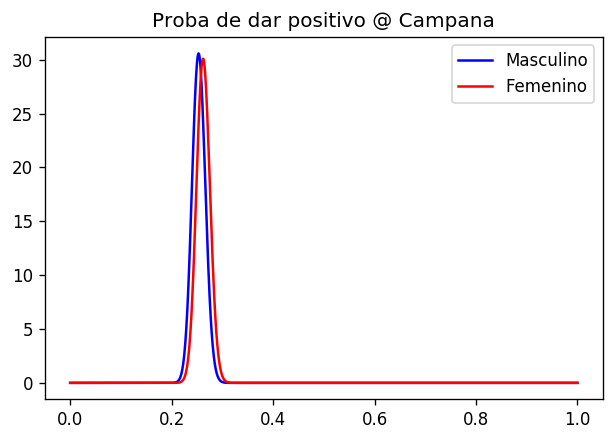

In [151]:
xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=positivosM+1, b=negativosM+1),'b-',label='Masculino')
plt.plot(xs, stats.beta.pdf(xs,a=positivosF+1, b=negativosF+1),'r-',label='Femenino')
plt.title('Proba de dar positivo @ '+localidad)
plt.legend(loc=1)
plt.show()

# Ahora exploremos la probabilidad de contagiarse según el sexo: <br><br>$\longrightarrow$Dado que te contagias, cuál es la proba de ser F ?

In [153]:
masculino = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'M')])
femenino = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'F')])
print(masculino, femenino)

140073 135040


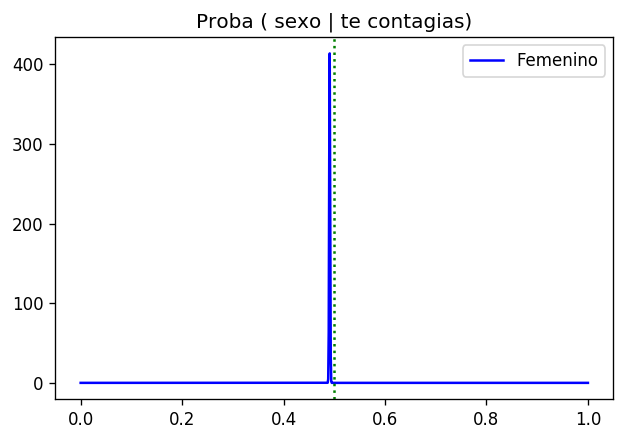

In [154]:
xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=femenino+1, b=masculino+1),'b-',label='Femenino')
plt.axvline(x=0.5, color='g', linestyle=':')
plt.title('Proba ( sexo | te contagias)')
plt.legend(loc=1)
plt.show()

## Por localidad ?

In [362]:
#localidad = 'San Rafael'
#localidad = 'Zárate'
localidad = 'COMUNA 13'
#localidad = 'Campana'
#localidad = 'Capital'
#localidad = 'San Martín'
masculino = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'M') & (cases['residencia_departamento_nombre'].str.contains(localidad))])
femenino = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'F') & (cases['residencia_departamento_nombre'].str.contains(localidad))])
print(masculino, femenino)

426 548


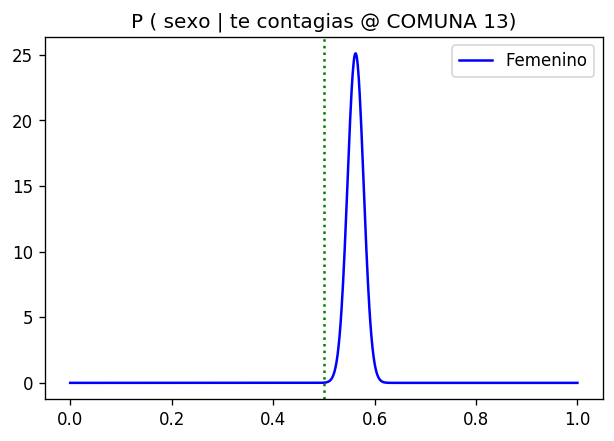

In [363]:
xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=femenino+1, b=masculino+1),'b-',label='Femenino')
plt.title('P ( sexo | te contagias @ '+localidad+')')
plt.axvline(x=0.5, color='g', linestyle=':')
plt.legend(loc=1)
plt.show()

## Ahora agreguemos edad 

In [378]:
#localidad = 'Zárate'
localidad = 'COMUNA 13'
#localidad = 'Campana'
#localidad = 'Capital'
#localidad = 'San Martín'
edad_max = 100
edad_min = 60
masculino = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'M') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])
femenino = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'F') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])
print(masculino, femenino)

84 191


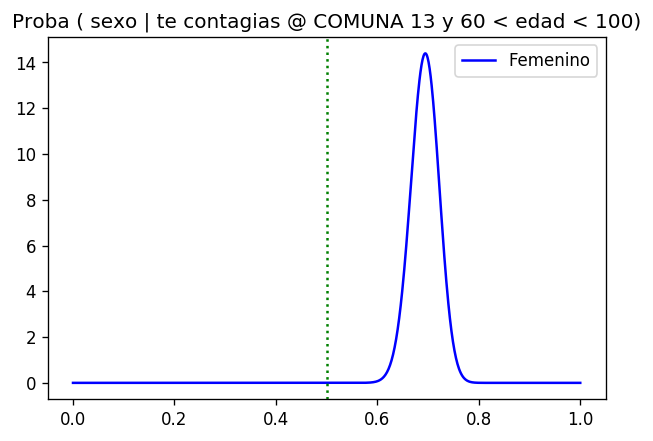

In [379]:
xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=femenino+1, b=masculino+1),'b-',label='Femenino')
plt.title('Proba ( sexo | te contagias @ '+localidad+' y '+str(edad_min)+' < edad < '+str(edad_max)+')')
plt.axvline(x=0.5, color='g', linestyle=':')
plt.legend(loc=1)
plt.show()

## Ahora veamos la evolución temporal

Utilizamos "SEPI" = "Semana EPIdemiológica" (muy útil en epidemias y otros dividir por semanas para sacarse de encima efectos de ías de la semana)

In [383]:
#localidad = 'Zárate'
#localidad = 'COMUNA 13'
#localidad = 'Campana'
#localidad = 'Capital'
localidad = 'San Martín'
#localidad = 'San Isidro'
#localidad = 'Quilmes'
edad_min = 50
edad_max = 150
masculino=[]
femenino=[]
for sepi in range(18,25):
    masculino.append( len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'M') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max) & (cases['sepi_apertura'] == sepi)]) )
    femenino.append( len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['sexo'] == 'F') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max) & (cases['sepi_apertura'] == sepi)]) )
print(masculino, femenino)

[5, 7, 3, 6, 13, 19, 26] [12, 7, 3, 10, 11, 20, 16]


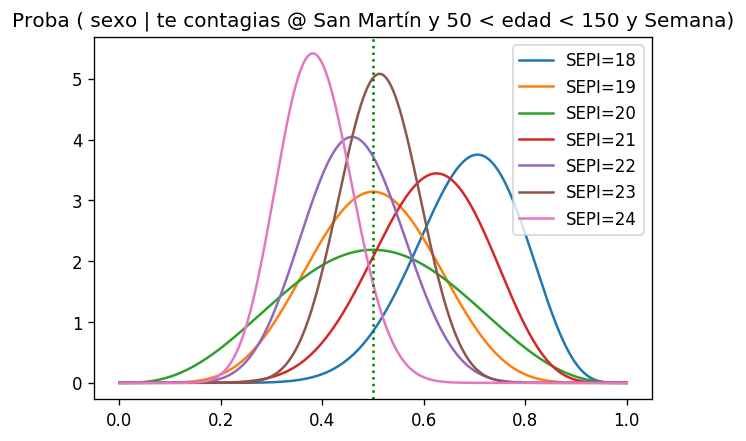

In [384]:
xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
i = 0
for sepi in range(18,25):
    plt.plot(xs, stats.beta.pdf(xs,a=femenino[i]+1, b=masculino[i]+1),'-',label='SEPI='+str(sepi))
    i = i + 1
plt.title('Proba ( sexo | te contagias @ '+localidad+' y '+str(edad_min)+' < edad < '+str(edad_max)+' y Semana)')
plt.axvline(x=0.5, color='g', linestyle=':')
plt.legend(loc=1)
plt.show()

## P ( fallecer | contagiado ) 

In [385]:
# Total fallecidos
print(len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'SI')]))

5362


In [386]:
localidad = 'Isidro'
#localidad = 'COMUNA 13'
#localidad = 'Campana'
#localidad = 'Capital'
#localidad = 'San Martín'
edad_max = 100
edad_min = 0

fallece = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'SI') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])
no_fallece = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'NO') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])

print(fallece, no_fallece)

97 4603


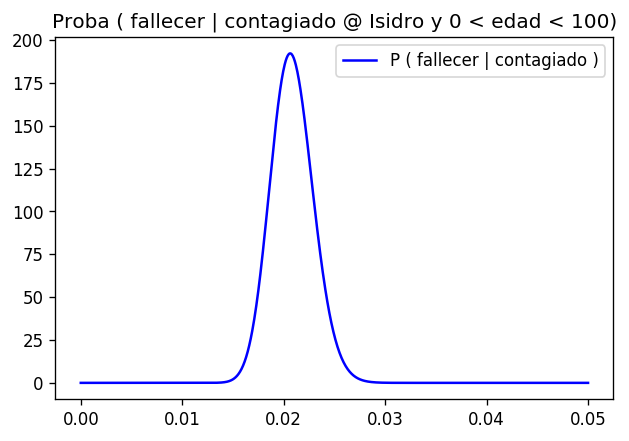

In [387]:
xs = np.linspace(0,.05,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=fallece+1, b=no_fallece+1),'b-',label='P ( fallecer | contagiado )')
plt.title('Proba ( fallecer | contagiado @ '+localidad+' y '+str(edad_min)+' < edad < '+str(edad_max)+')')
plt.legend(loc=1)
plt.show()

## P ( fallecer | contagiado , UTI) 

In [390]:
#localidad = 'Isidro'
#localidad = 'COMUNA 13'
#localidad = 'Campana'
#localidad = 'Capital'
localidad = 'San Martín'
edad_max = 150
edad_min = 60

fallece = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'SI') & (cases['cuidado_intensivo'] == 'SI') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])
no_fallece = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['fallecido'] == 'NO') & (cases['cuidado_intensivo'] == 'SI') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])

print(fallece, no_fallece)

40 36


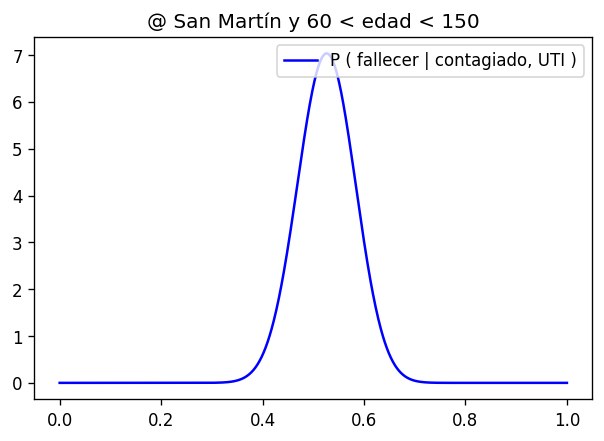

In [391]:
xs = np.linspace(0,1,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=fallece+1, b=no_fallece+1),'b-',label='P ( fallecer | contagiado, UTI )')
plt.title('@ '+localidad+' y '+str(edad_min)+' < edad < '+str(edad_max)+'')
plt.legend(loc=1)
plt.show()

## P ( fallecer | público ) Vs P ( fallecer | privado )

In [392]:
# Verifico que la cantidad de registros cuyo sistema de salud no es publico ni privado es insignificante
len(cases.loc[(~cases['origen_financiamiento'].str.contains('rivado')) & (~cases['origen_financiamiento'].str.contains('blico')) ])

20

In [397]:
#localidad = ''
#localidad = 'COMUNA 12'
#localidad = 'Campana'
#localidad = 'Capital'
#localidad = 'San Martín'
localidad = 'Quilmes'
edad_max = 150
edad_min = 50

fallece_publico = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['origen_financiamiento'].str.contains('blico')) & (cases['fallecido'] == 'SI') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])
no_fallece_publico = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['origen_financiamiento'].str.contains('blico')) & (cases['fallecido'] == 'NO') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])

fallece_privado = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['origen_financiamiento'].str.contains('rivado')) & (cases['fallecido'] == 'SI') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])
no_fallece_privado = len(cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['origen_financiamiento'].str.contains('rivado')) & (cases['fallecido'] == 'NO') & (cases['residencia_departamento_nombre'].str.contains(localidad)) & (cases['edad'] > edad_min) & (cases['edad'] < edad_max)])

print(fallece_publico, no_fallece_publico)
print(fallece_privado, no_fallece_privado)

53 1412
132 1082


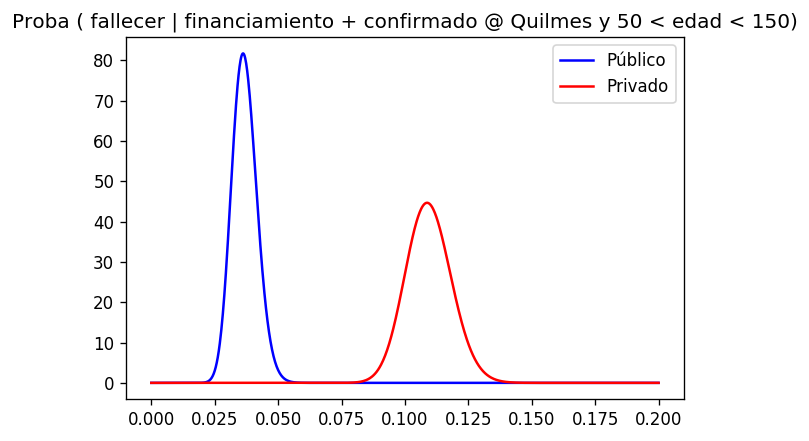

In [398]:
xs = np.linspace(0,.2,1001)
plt.figure(dpi=120)
plt.plot(xs, stats.beta.pdf(xs,a=fallece_publico+1, b=no_fallece_publico+1),'b-',label='Público')
plt.plot(xs, stats.beta.pdf(xs,a=fallece_privado+1, b=no_fallece_privado+1),'r-',label='Privado')
plt.title('Proba ( fallecer | financiamiento + confirmado @ '+localidad+' y '+str(edad_min)+' < edad < '+str(edad_max)+')')
plt.legend(loc=1)
plt.show()

Es contrario a lo que uno podría esperar. Tal vez se deba a que con los programas detectar se testea mucha gente preferiblemente de financiamiento público.  Entonces, cuando uno dice "dado que es público, cuá es la probabilidad de fallecer", ese número se achica porque hay un sesgo de que haya más reportados públicos.  No lo śe. 

# Finalmente: jugar por jugar y ver la evolución de casos en tu barrio 

In [399]:
start_date = date(2020,3,1)
today= datetime.now().date()
total_days = (today - start_date).days
print(today)

2020-08-17


In [400]:
#localidad="COMUNA 12"
#localidad="San Martín"
localidad="COMUNA 07"
seleccionados = cases.loc[(cases['clasificacion_resumen'] == 'Confirmado') & (cases['residencia_departamento_nombre'].str.contains(localidad))]
#seleccionados = cases.loc[(cases['clasificacion_resumen'] == 'Confirmado')]
seleccionados.reset_index()
len(seleccionados)

4463

In [401]:
seleccionados['fecha_apertura'] = pd.to_datetime(seleccionados['fecha_apertura'])
seleccionados['fecha_apertura'] = seleccionados['fecha_apertura'].dt.date

/home/sequi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/sequi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [402]:
casos_por_dia = []
for i in range(total_days):
    day = start_date + timedelta(days=i)
    casos_por_dia.append([day, len(seleccionados.loc[seleccionados['fecha_apertura'] == day])])

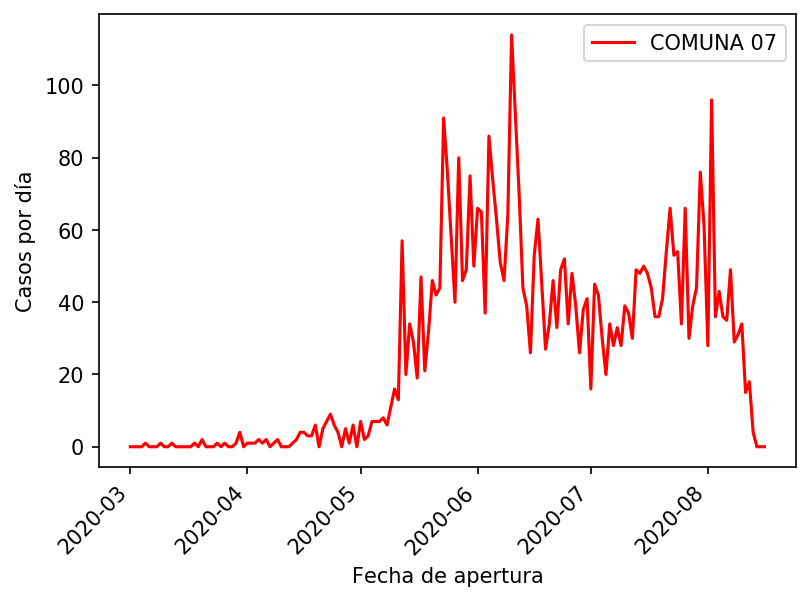

In [403]:
plt.figure(dpi=150)
plt.plot([x[0] for x in casos_por_dia],[x[1] for x in casos_por_dia],'r-',label=localidad)
plt.ylabel('Casos por día')
plt.xlabel('Fecha de apertura')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()